# Autoencode me

Let's use a different architecture, an autoencoder!

We will use the functional API to define the autoencoder!

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the model layers
ae_input = Input(shape=(784,))
encoder_1 = Dense(256, activation='relu')(ae_input)
encoder_2 = Dense(32, activation='relu')(encoder_1)

decoder_2 = Dense(32, activation='relu')(encoder_2)
decoder_1 = Dense(256, activation='relu')(decoder_2)
ae_output = Dense(784, activation='sigmoid')(decoder_1)

# Define the autoencoder and encoder models
autoencoder = Model(ae_input, ae_output)
encoder = Model(ae_input, encoder_2)



Build the model and a get a handler to extract the hidden representation (encoded_2). Note that the weights are shared between the two models!

In [2]:
from tensorflow.keras.optimizers import Adam
# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')


Get the data (as usual):

In [3]:
from tensorflow.keras.datasets import mnist

# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) / 255.0
x_test = x_test.reshape((-1, 28 * 28)) / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Train the autoencoder!

In [4]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 2s - 7ms/step - loss: 0.2293
Epoch 2/50
235/235 - 1s - 3ms/step - loss: 0.1408
Epoch 3/50
235/235 - 1s - 3ms/step - loss: 0.1229
Epoch 4/50
235/235 - 1s - 3ms/step - loss: 0.1148
Epoch 5/50
235/235 - 1s - 3ms/step - loss: 0.1102
Epoch 6/50
235/235 - 1s - 3ms/step - loss: 0.1069
Epoch 7/50
235/235 - 1s - 3ms/step - loss: 0.1042
Epoch 8/50
235/235 - 1s - 3ms/step - loss: 0.1021
Epoch 9/50
235/235 - 1s - 3ms/step - loss: 0.1005
Epoch 10/50
235/235 - 1s - 3ms/step - loss: 0.0993
Epoch 11/50
235/235 - 1s - 3ms/step - loss: 0.0981
Epoch 12/50
235/235 - 1s - 3ms/step - loss: 0.0971
Epoch 13/50
235/235 - 1s - 3ms/step - loss: 0.0960
Epoch 14/50
235/235 - 1s - 3ms/step - loss: 0.0950
Epoch 15/50
235/235 - 1s - 3ms/step - loss: 0.0941
Epoch 16/50
235/235 - 1s - 3ms/step - loss: 0.0934
Epoch 17/50
235/235 - 1s - 3ms/step - loss: 0.0927
Epoch 18/50
235/235 - 1s - 3ms/step - loss: 0.0921
Epoch 19/50
235/235 - 1s - 3ms/step - loss: 0.0915
Epoch 20/50
235/235 - 1s - 3ms/step - lo

Let's evaluate the model by reconstructing some images!

In [5]:
# Use the autoencoder to reconstruct images
original_images = x_test[:10]
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Original Images:


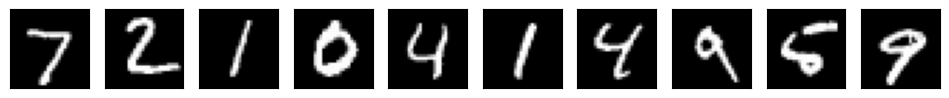

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Original Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


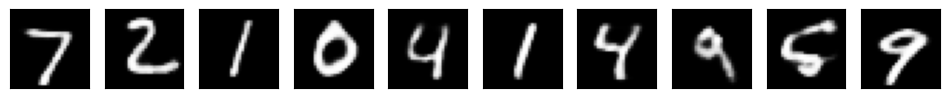

In [7]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Pretty impressive, given that we compressed the data into just 32 dimensions (compression rate > 24). Note that the model performs a kind of smoothing/denoising.

We can further improve the "denoising" abilities of the model by adding noise during the training!

In [8]:
autoencoder.fit(x_train + 0.4*np.random.randn(x_train.shape[0], 784), x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 1s - 2ms/step - loss: 0.1285
Epoch 2/50
235/235 - 1s - 2ms/step - loss: 0.1120
Epoch 3/50
235/235 - 1s - 2ms/step - loss: 0.1088
Epoch 4/50
235/235 - 1s - 2ms/step - loss: 0.1070
Epoch 5/50
235/235 - 1s - 3ms/step - loss: 0.1057
Epoch 6/50
235/235 - 1s - 2ms/step - loss: 0.1048
Epoch 7/50
235/235 - 1s - 2ms/step - loss: 0.1040
Epoch 8/50
235/235 - 1s - 2ms/step - loss: 0.1034
Epoch 9/50
235/235 - 1s - 2ms/step - loss: 0.1028
Epoch 10/50
235/235 - 1s - 2ms/step - loss: 0.1024
Epoch 11/50
235/235 - 1s - 2ms/step - loss: 0.1020
Epoch 12/50
235/235 - 1s - 2ms/step - loss: 0.1017
Epoch 13/50
235/235 - 1s - 2ms/step - loss: 0.1012
Epoch 14/50
235/235 - 1s - 2ms/step - loss: 0.1010
Epoch 15/50
235/235 - 1s - 2ms/step - loss: 0.1007
Epoch 16/50
235/235 - 1s - 2ms/step - loss: 0.1005
Epoch 17/50
235/235 - 1s - 2ms/step - loss: 0.1003
Epoch 18/50
235/235 - 1s - 2ms/step - loss: 0.1000
Epoch 19/50
235/235 - 1s - 3ms/step - loss: 0.0999
Epoch 20/50
235/235 - 1s - 2ms/step - lo

Let's reconstruct some noisy images!

In [9]:
original_images = x_test[:10] + 0.4*np.random.randn(10, 784)
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Noisy Images:


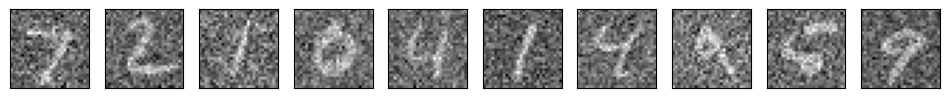

In [10]:
print("Noisy Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


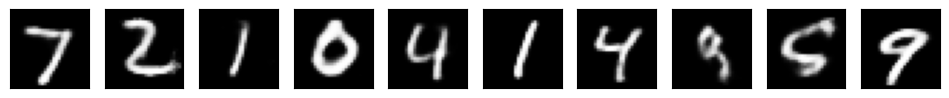

In [11]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)